# Polynomial Regression

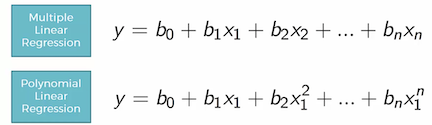

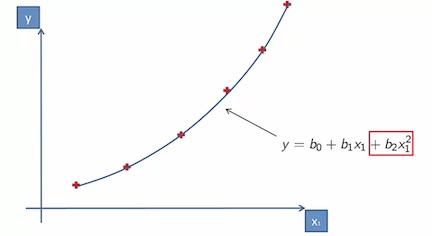

### Polynomial regression is still linear regression in that its a series of coefficients with independent variables. However, do not confuse linear formulas with the shape, it is only linear in that the formula is linear. It is  in practice meant to better capture realtionships that are visually non-linear.

## Importing the libraries

In [31]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [32]:
dataset = pd.read_csv("Position_Salaries.csv")
X = dataset.iloc[:,1:-1].values
y = dataset.iloc[:,-1].values

# We do not need to encode because the position category is already encoded in essence by the level
# However, use the 1:-1 for the X column becuase if you just to column [:, 1], it will not be a single vector
# sklearn expects to see a matrix of at least 2 dimensions so it needs to be [[]]
print(X)
print(y)

[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]
[  45000   50000   60000   80000  110000  150000  200000  300000  500000
 1000000]


## Training the Linear Regression model on the whole dataset

In [33]:
# ****Unlike most Ml steps, in this rare case we will not train_test_split our data due to the small numer of observations. 
# We want to capture as much as possible for training so we will skip the aboe step, but this is an unusal case

from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [42]:
lin_reg.coef_

array([80878.78787879])

In [43]:
lin_reg.intercept_

-195333.33333333337

## Training the Polynomial Regression model on the whole dataset

In [38]:
# For polynomial regression we are creating a matrix of features for the exponents. So instead of numerous features that are independent features
# We will have a single indpedent variable and the features that differ are the exponents
# Our new matrix of feature will be built by transforming the lin_reg single feature X into polynomial features
# We start out testing polynomial at degree = 2 but will alter as we go for better fit at = 4

from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 4)
X_poly = poly_reg.fit_transform(X)
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [44]:
lin_reg_2.coef_

array([      0.        , -211002.33100292,   94765.44289063,
        -15463.28671331,     890.15151515])

In [45]:
lin_reg_2.intercept_

184166.66666719737

In [46]:
print(X_poly)

[[1.000e+00 1.000e+00 1.000e+00 1.000e+00 1.000e+00]
 [1.000e+00 2.000e+00 4.000e+00 8.000e+00 1.600e+01]
 [1.000e+00 3.000e+00 9.000e+00 2.700e+01 8.100e+01]
 [1.000e+00 4.000e+00 1.600e+01 6.400e+01 2.560e+02]
 [1.000e+00 5.000e+00 2.500e+01 1.250e+02 6.250e+02]
 [1.000e+00 6.000e+00 3.600e+01 2.160e+02 1.296e+03]
 [1.000e+00 7.000e+00 4.900e+01 3.430e+02 2.401e+03]
 [1.000e+00 8.000e+00 6.400e+01 5.120e+02 4.096e+03]
 [1.000e+00 9.000e+00 8.100e+01 7.290e+02 6.561e+03]
 [1.000e+00 1.000e+01 1.000e+02 1.000e+03 1.000e+04]]


## Visualising the Linear Regression results

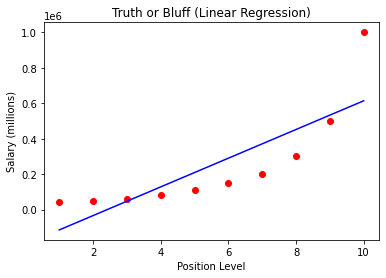

In [47]:
plt.scatter(X, y, color = 'red')
plt.plot(X, lin_reg.predict(X), color = 'blue')
plt.title('Truth or Bluff (Linear Regression)')
plt.xlabel('Position Level')
plt.ylabel('Salary (millions)')
plt.show()

# we can see that the linear reg is not well adapted for the data in this case

## Visualising the Polynomial Regression results

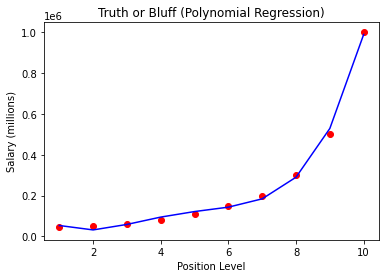

In [49]:
plt.scatter(X, y, color = 'red')
plt.plot(X, lin_reg_2.predict(X_poly), color = 'blue')
plt.title('Truth or Bluff (Polynomial Regression)')
plt.xlabel('Position Level')
plt.ylabel('Salary (millions)')
plt.show()

# The polynomial model is much better adapted to predict the data visually, and the degree =4 is better than degree =2

## Visualising the Polynomial Regression results (for higher resolution and smoother curve)

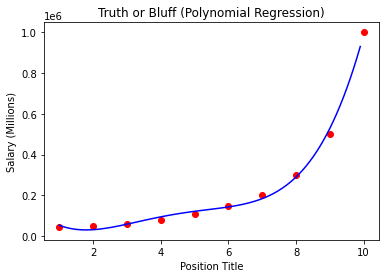

In [51]:
X_grid = np.arange(min(X), max(X), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X, y, color='red')
plt.plot(X_grid, lin_reg_2.predict(poly_reg.fit_transform(X_grid)), color='blue')
plt.title('Truth or Bluff (Polynomial Regression)')
plt.xlabel('Position Title')
plt.ylabel('Salary (Millions)')
plt.show()

# This section is mostly for show as we will usually have models with multiple features that we can't plot
# We just changed the X values to be more continuous with intervals of 0.1 from 1-10

## Predicting a new result with Linear Regression

In [71]:
lin_reg.predict([[6.5]])
# This is as expected quite a bad prediction and well above the actual datapoint near 6 years

array([330378.78787879])

## Predicting a new result with Polynomial Regression

In [75]:
lin_reg_2.predict(poly_reg.fit_transform([[6.5]]))
# for this prediction we cant just put 6.5, we have fit the array to the degree=4 model using the 6.5 input instead of X
# This is much closer as a prediction to reality and would be useful as opposed to the linear model

array([158862.45265155])

## Find the R2 for each of the models

In [63]:
# Remember that there was no train test split so for this case you just use the X,y, and X-poly data for scoring
from sklearn.metrics import r2_score

r2_score(y, lin_reg.predict(X))

0.6690412331929895

In [67]:
# Clearly the polynomial model is significantly better for predicitions base don .997 R2
r2_score(y, lin_reg_2.predict(X_poly))

0.9973922891706615

In [68]:
lin_reg.score(X, y)

0.6690412331929895

In [69]:
lin_reg_2.score(X_poly, y)

0.9973922891706615